# Clausius-Clapeyron $e_s(T)$: exp(-1/T) or exp(T)?

[Wikipedia](https://en.wikipedia.org/wiki/Clausius%E2%80%93Clapeyron_relation#cite_note-8) has this formula: 

### $e_s = 6.1094 exp( \frac{(17.625 T)}{(T+243.04)} )$  (August-Roche-Magnus formula, with T in C and $e_s$ in hPa) 

Is it exponential in T, or in -1/T? 

Both, but which gives the distinctive curved shape?

In [7]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


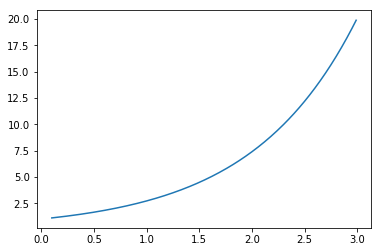

In [55]:
# The shape of an exponential: 

T = np.arange(0.1,3,0.01, dtype=float)
plot(T, np.exp(T))

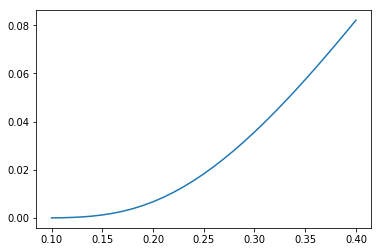

In [56]:
# The shape of exp(-1/T): 

T = np.arange(0.1,0.4,0.01, dtype=float)
plot(T, np.exp(-1./T))

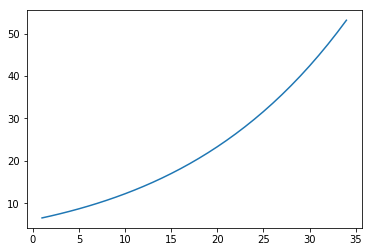

In [96]:
# The formula in question 

T = np.arange(1,35) # in Celsius
es = 6.1094 *exp( (17.625*T)/(T+243.04) ) # August-Roche-Magnus, 

plot(T,es)
# wikipedia https://en.wikipedia.org/wiki/Clausius–Clapeyron_relation
# https://journals.ametsoc.org/doi/pdf/10.1175/1520-0450%281996%29035%3C0601%3AIMFAOS%3E2.0.CO%3B2

# Is that upward curvature from the exp(T) or the exp(-1/T) component? 

-------
## A physical approach: Clauisus-Clapeyron law for the slope of $e_s$

### $ \frac{de_s}{dT} = \frac{L e_s}{R T^2}   $

### $ {d ln(e_s)} = \frac{L_v(T)}{R_v} T^{-2} dT  $

### $ ln(e_s) = -2 \frac{L_v(T)}{R_v} T^{-1} + c $

### $ e_s = c e^{ \frac{L_v(T)}{R_v} T^{-1} }$ 

## **so the answer is MOSTLY exp(1/T), neglecting the modest $dL_v/dT$**


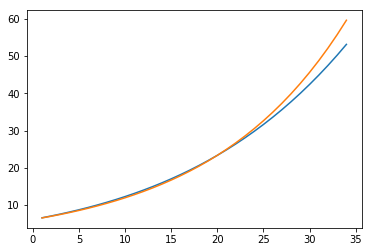

In [99]:
# constant T version of August-Roche-Magnus formula at 20C: the denominator is the one to fix

es_Lconst = 6.1094 *exp( (17.625*T)/(20+243.04) )

plot(T, es) # blue
plot(T, es_Lconst) #orange

------------
------------
# Failed approach
## Let's separate the formula mathematically:

### 1. Could write $e^{ aT/(T+b) } = e^{aT} e^{-(T+b)}$ with a=17.625 and b=243.04. 

Unfortunately, $e^{17T}$ for T in C blows up crazily!

### 2. Math also allows $e^{ \frac{aT}{b(1+T/b)} } = e^{aT/b} e^{-(1 + T/b)} = f_1 f_2$. 

BUGS !? Unresolved. 

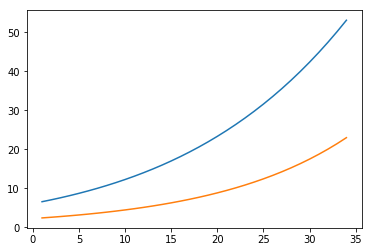

In [98]:
a=17.625
b=243.04
c=6.1094 

# Check the basic formula es = 6.1094 *exp( (17.625*TC)/(TC+243.04) ) # August-Roche-Magnus
esat = c *exp( a*T/(b+T) )
plot(T,esat)

# Now the separated version, evaluated
f1 = np.exp(a*T/b)
f2 = np.exp( -(1+T/b) )

esat2 = c*f1*f2
plot(T, esat2)

# ERROR? Unresolved! 